In [23]:
pip install -U scikit-learn


You should consider upgrading via the '/Users/anaconda3/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [11]:
pip install statsmodels

Note: you may need to restart the kernel to use updated packages.


In [1]:
import sklearn
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import statsmodels.formula.api as smf
from sklearn.metrics import r2_score



In [2]:
ls

AI [Regression ].ipynb
Cars.csv
Linear New.py
MLR.py
Multi Linear Regression-updated -nonlinearity.ipynb
Multi Linear Regression-updated .ipynb
Multi Linear Regression.ipynb
china_gdp.csv
untitled
wc-at.csv


(109, 2) Shape of Data Frame
   Waist     AT
0  74.75  25.72
1  72.60  25.89
2  81.80  42.60
3  83.95  42.80
4  74.65  29.84
5  71.85  21.68
6  80.90  29.08
7  83.40  32.98
8  63.50  11.44
9  73.20  32.22


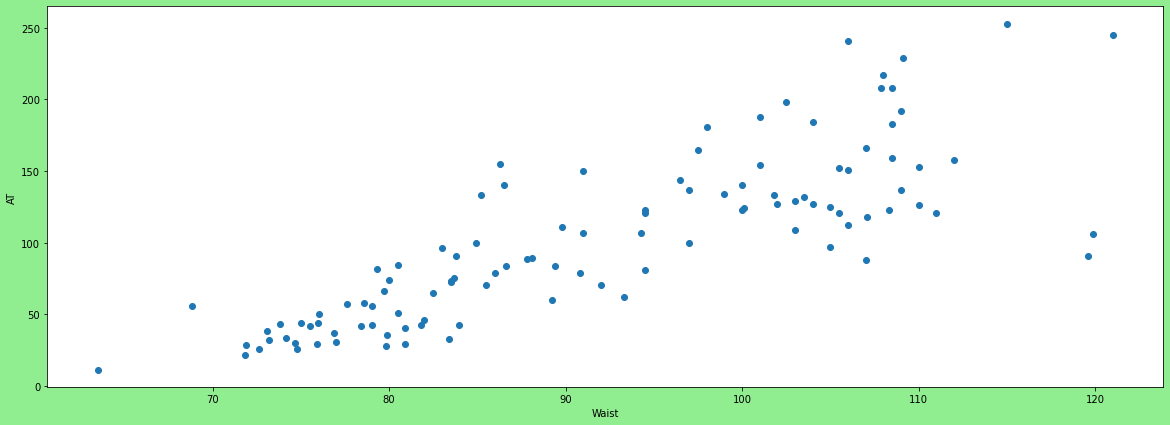

In [3]:

wcat = pd.read_csv("wc-at.csv")

print (wcat.shape,"Shape of Data Frame")
print ("="*30)

print (wcat.head(10))

plt.figure(figsize=(20,7),facecolor="lightgreen")
plt.scatter(wcat.Waist,wcat.AT)
plt.xlabel("Waist");
plt.ylabel("AT")
# print (wcat.AT)
plt.show()

In [5]:
wcat.corr()

,Waist,AT
Waist,1.000000,0.818558
AT,0.818558,1.000000


In [6]:
wcat.shape

(109, 2)

# creating model with SKLEARN

In [24]:
wcat

,Waist,AT
0,74.75,25.72
1,72.60,25.89
2,81.80,42.60
3,83.95,42.80
4,74.65,29.84
...,...,...
104,100.10,124.00
105,93.30,62.20
106,101.80,133.00
107,107.90,208.00


In [9]:
wcat["Waist"]

0       74.75
1       72.60
2       81.80
3       83.95
4       74.65
        ...  
104    100.10
105     93.30
106    101.80
107    107.90
108    108.50
Name: Waist, Length: 109, dtype: float64

In [14]:
wcat["Waist"].values.reshape(-1,1)

array([[ 74.75],
       [ 72.6 ],
       [ 81.8 ],
       [ 83.95],
       [ 74.65],
       [ 71.85],
       [ 80.9 ],
       [ 83.4 ],
       [ 63.5 ],
       [ 73.2 ],
       [ 71.9 ],
       [ 75.  ],
       [ 73.1 ],
       [ 79.  ],
       [ 77.  ],
       [ 68.85],
       [ 75.95],
       [ 74.15],
       [ 73.8 ],
       [ 75.9 ],
       [ 76.85],
       [ 80.9 ],
       [ 79.9 ],
       [ 89.2 ],
       [ 82.  ],
       [ 92.  ],
       [ 86.6 ],
       [ 80.5 ],
       [ 86.  ],
       [ 82.5 ],
       [ 83.5 ],
       [ 88.1 ],
       [ 90.8 ],
       [ 89.4 ],
       [102.  ],
       [ 94.5 ],
       [ 91.  ],
       [103.  ],
       [ 80.  ],
       [ 79.  ],
       [ 83.5 ],
       [ 76.  ],
       [ 80.5 ],
       [ 86.5 ],
       [ 83.  ],
       [107.1 ],
       [ 94.3 ],
       [ 94.5 ],
       [ 79.7 ],
       [ 79.3 ],
       [ 89.8 ],
       [ 83.8 ],
       [ 85.2 ],
       [ 75.5 ],
       [ 78.4 ],
       [ 78.6 ],
       [ 87.8 ],
       [ 86.3 ],
       [ 85.5 

In [15]:
lm = LinearRegression()

X = wcat["Waist"].values.reshape(-1,1)
Y = wcat["AT"].values.reshape(-1,1)

lm.fit(X,Y)


In [27]:
wcat["Waist"]


0       74.75
1       72.60
2       81.80
3       83.95
4       74.65
        ...  
104    100.10
105     93.30
106    101.80
107    107.90
108    108.50
Name: Waist, Length: 109, dtype: float64

In [16]:
print (lm.coef_)#alpha 
print (lm.intercept_)#beta

[[3.45885939]]
[-215.98148796]


In [17]:
lm.predict(X)

array([[ 42.56825159],
       [ 35.1317039 ],
       [ 66.95321031],
       [ 74.389758  ],
       [ 42.22236565],
       [ 32.53755936],
       [ 63.84023685],
       [ 72.48738533],
       [  3.65608343],
       [ 37.20701954],
       [ 32.71050233],
       [ 43.43296644],
       [ 36.8611336 ],
       [ 57.26840401],
       [ 50.35068522],
       [ 22.16098118],
       [ 46.71888286],
       [ 40.49293596],
       [ 39.28233517],
       [ 46.54593989],
       [ 49.83185632],
       [ 63.84023685],
       [ 60.38137746],
       [ 92.54876981],
       [ 67.64498219],
       [102.23357611],
       [ 83.55573539],
       [ 62.4566931 ],
       [ 81.48041975],
       [ 69.37441188],
       [ 72.83327127],
       [ 88.74402448],
       [ 98.08294484],
       [ 93.24054169],
       [136.82217003],
       [110.88072459],
       [ 98.77471671],
       [140.28102942],
       [ 60.7272634 ],
       [ 57.26840401],
       [ 72.83327127],
       [ 46.89182583],
       [ 62.4566931 ],
       [ 83

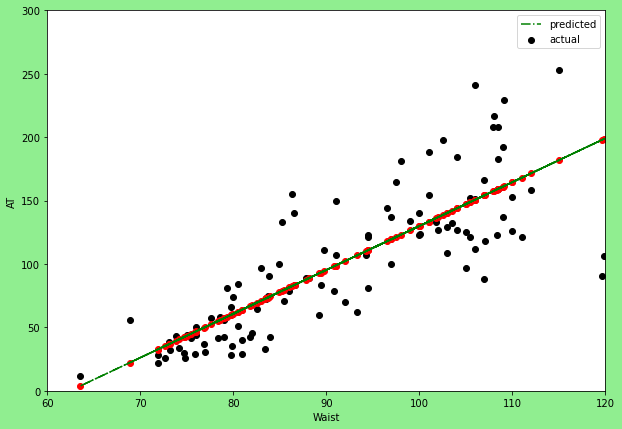

In [18]:
plt.figure(figsize=(10,7),facecolor="lightgreen")
plt.scatter(wcat.Waist,(wcat.AT),color="black",label="actual");
plt.plot(wcat.Waist,lm.predict(X),label="predicted",color="green",linestyle="-.");
plt.scatter(wcat.Waist,lm.predict(X),color="red")
plt.xlabel("Waist");
plt.ylabel("AT")
plt.xlim(60,120)
plt.ylim(0,+300)
# print (wcat.AT)
plt.legend(loc="best")
plt.show()




## model validation 

In [19]:
pred_train_lm =lm.predict(X)
r2_score(wcat["AT"],pred_train_lm)


0.6700368930528429

# model with statsmodels

In [4]:
wcat

,Waist,AT
0,74.75,25.72
1,72.60,25.89
2,81.80,42.60
3,83.95,42.80
4,74.65,29.84
...,...,...
104,100.10,124.00
105,93.30,62.20
106,101.80,133.00
107,107.90,208.00


In [5]:
first_model = smf.ols("AT~Waist",data=wcat).fit()
# pred_statsmodel = first_model.predict(wcat["Waist"])
# r2_score(wcat["AT"],pred_train_lm)

In [11]:
first_model.params

Intercept   -215.981488
Waist          3.458859
dtype: float64

In [8]:
first_model.params

# AT =3.45*Wc -215.98

#3.45*80 -215.98

Intercept   -215.981488
Waist          3.458859
dtype: float64

In [64]:
first_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     AT   R-squared:                       0.670
Model:                            OLS   Adj. R-squared:                  0.667
Method:                 Least Squares   F-statistic:                     217.3
Date:                Sun, 27 Feb 2022   Prob (F-statistic):           1.62e-27
Time:                        11:33:14   Log-Likelihood:                -534.99
No. Observations:                 109   AIC:                             1074.
Df Residuals:                     107   BIC:                             1079.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -215.9815     21.796     -9.909      0.000    -259.190    -172.773
Waist          3.4589      0.235     14.740      0.000       2.994       3.924
==============================================================================
Omnibus:                        3.960   Durbin-Watson:                   1.560
Prob(Omnibus):                  0.138   Jarque-Bera (JB):                4.596
Skew:                           0.104   Prob(JB):                        0.100
Kurtosis:                       3.984   Cond. No.                         639.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [14]:
first_model.resid

0     -16.848252
1      -9.241704
2     -24.353210
3     -31.589758
4     -12.382366
         ...    
104    -6.250337
105   -44.530093
106    -3.130398
107    50.770560
108    48.695244
Length: 109, dtype: float64

In [15]:
first_model.predict()

array([ 42.56825159,  35.1317039 ,  66.95321031,  74.389758  ,
        42.22236565,  32.53755936,  63.84023685,  72.48738533,
         3.65608343,  37.20701954,  32.71050233,  43.43296644,
        36.8611336 ,  57.26840401,  50.35068522,  22.16098118,
        46.71888286,  40.49293596,  39.28233517,  46.54593989,
        49.83185632,  63.84023685,  60.38137746,  92.54876981,
        67.64498219, 102.23357611,  83.55573539,  62.4566931 ,
        81.48041975,  69.37441188,  72.83327127,  88.74402448,
        98.08294484,  93.24054169, 136.82217003, 110.88072459,
        98.77471671, 140.28102942,  60.7272634 ,  57.26840401,
        72.83327127,  46.89182583,  62.4566931 ,  83.20984945,
        71.10384158, 154.46235293, 110.18895271, 110.88072459,
        59.68960558,  58.30606183,  94.62408544,  73.87092909,
        78.71333224,  45.16239614,  55.19308837,  55.88486025,
        87.70636666,  82.51807757,  79.75099006,  73.52504315,
        52.42600086,  77.67567442,  60.03549152, 158.61

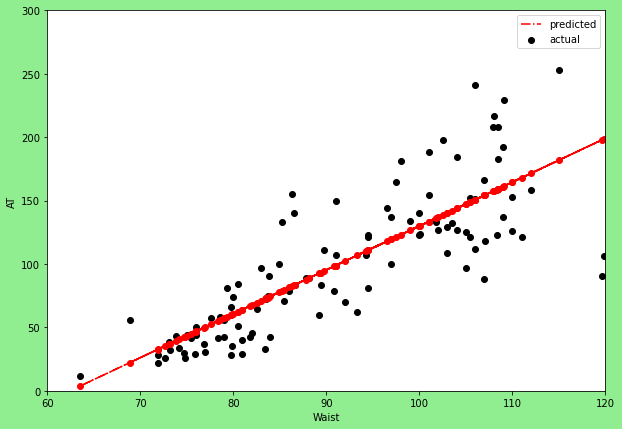

In [66]:
plt.figure(figsize=(10,7),facecolor="lightgreen")
plt.scatter(wcat.Waist,wcat.AT,color="black",label="actual");
plt.plot(wcat.Waist,first_model.predict(),label="predicted",color="red",linestyle="-.");
plt.scatter(wcat.Waist,first_model.predict(),color="red")
plt.xlabel("Waist");
plt.ylabel("AT")
plt.xlim(60,120)
plt.ylim(0,+300)
# print (wcat.AT)
plt.legend(loc="best")
plt.show()




In [ ]:
# AT = a*WC+b
# AT = a*log(wc)+b
# AT = a*exp(wc)+b
# At = a1*wc+a2*wc^2+b

#y=2x+4x^2+10

In [24]:
model2 = smf.ols('AT~np.log(Waist)',data=wcat).fit()
model2.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     AT   R-squared:                       0.675
Model:                            OLS   Adj. R-squared:                  0.672
Method:                 Least Squares   F-statistic:                     222.6
Date:                Sat, 19 Feb 2022   Prob (F-statistic):           6.80e-28
Time:                        16:49:30   Log-Likelihood:                -534.11
No. Observations:                 109   AIC:                             1072.
Df Residuals:                     107   BIC:                             1078.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -1328.3420     95.923    -13.848      0.000   -1518.498   -1138.186
np.log(Waist)   317.1356     21.258     14.918      0.000     274.994     359.277
==============================================================================
Omnibus:                        3.317   Durbin-Watson:                   1.599
Prob(Omnibus):                  0.190   Jarque-Bera (JB):                2.908
Skew:                           0.235   Prob(JB):                        0.234
Kurtosis:                       3.647   Cond. No.                         145.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [18]:
model3 = smf.ols('np.log(AT)~(Waist)',data=wcat).fit()
model3.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             np.log(AT)   R-squared:                       0.707
Model:                            OLS   Adj. R-squared:                  0.704
Method:                 Least Squares   F-statistic:                     258.3
Date:                Sat, 17 Sep 2022   Prob (F-statistic):           2.68e-30
Time:                        12:19:53   Log-Likelihood:                -40.123
No. Observations:                 109   AIC:                             84.25
Df Residuals:                     107   BIC:                             89.63
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.7410      0.233      3.185      0.002       0.280       1.202
Waist          0.0403      0.003     16.073      0.000       0.035       0.045
==============================================================================
Omnibus:                        2.604   Durbin-Watson:                   1.201
Prob(Omnibus):                  0.272   Jarque-Bera (JB):                2.117
Skew:                          -0.329   Prob(JB):                        0.347
Kurtosis:                       3.182   Cond. No.                         639.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [10]:
wcat["Waist_Sq"] = wcat.Waist**2
model_quad = smf.ols("np.log(AT)~Waist+Waist_Sq",data=wcat).fit()
# model_quad.params
model_quad.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             np.log(AT)   R-squared:                       0.779
Model:                            OLS   Adj. R-squared:                  0.775
Method:                 Least Squares   F-statistic:                     186.8
Date:                Fri, 19 Aug 2022   Prob (F-statistic):           1.80e-35
Time:                        08:24:24   Log-Likelihood:                -24.779
No. Observations:                 109   AIC:                             55.56
Df Residuals:                     106   BIC:                             63.63
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -7.8241      1.473     -5.312      0.000     -10.744      -4.904
Waist          0.2289      0.032      7.107      0.000       0.165       0.293
Waist_Sq      -0.0010      0.000     -5.871      0.000      -0.001      -0.001
==============================================================================
Omnibus:                        0.325   Durbin-Watson:                   1.464
Prob(Omnibus):                  0.850   Jarque-Bera (JB):                0.271
Skew:                           0.119   Prob(JB):                        0.873
Kurtosis:                       2.949   Cond. No.                     4.49e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.49e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [23]:
np.exp(model3.predict(wcat.iloc[20:30,0]))

20    46.266541
21    54.458630
22    52.310071
23    76.061058
24    56.924111
25    85.135421
26    68.503177
27    53.588815
28    66.868544
29    58.081384
dtype: float64

In [19]:
np.array([[12,1]]).shape

(1, 2)

In [ ]:
logy=10

y=exp(10)

In [32]:
wcat.iloc[109:110,:]=np.array([[1,2,3]])

In [34]:
np.array([[1,2,3]]).shape

(1, 3)

In [33]:
wcat

,Waist,AT,Waist_Sq
0,74.75,25.72,5587.5625
1,72.60,25.89,5270.7600
2,81.80,42.60,6691.2400
3,83.95,42.80,7047.6025
4,74.65,29.84,5572.6225
...,...,...,...
104,100.10,124.00,10020.0100
105,93.30,62.20,8704.8900
106,101.80,133.00,10363.2400
107,107.90,208.00,11642.4100


In [54]:
wcat.loc[110,:]=[1,2]